epoch: 10, loss = 0.0474
epoch: 20, loss = 0.0454
epoch: 30, loss = 0.0454
epoch: 40, loss = 0.0454
epoch: 50, loss = 0.0454
epoch: 60, loss = 0.0454
epoch: 70, loss = 0.0454
epoch: 80, loss = 0.0454
epoch: 90, loss = 0.0454
epoch: 100, loss = 0.0454


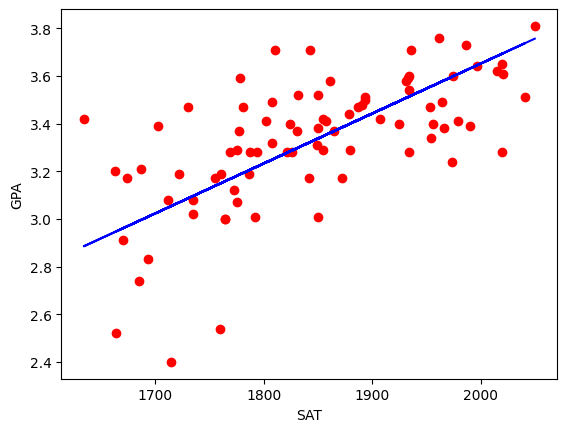

In [15]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('1.01. Simple linear regression.csv')

X_numpy = data['SAT'].values.reshape(-1, 1)
Y_numpy = data['GPA'].values.reshape(-1, 1)
X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))

n_samples, n_features = X.shape

#Model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

#Loss and optimizer
learning_rate = 0.0000001
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#Training loop
epochs = 100
for epoch in range(epochs):
    # Forward pass and loss
    y_pred = model(X)
    loss = criterion(y_pred, Y)

    # Backward pass
    loss.backward()
    optimizer.step()

    # Zero grad
    optimizer.zero_grad()

    if (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')

predicted = model(X).detach().numpy()
plt.plot(X_numpy, Y_numpy, 'ro', label='Original data')
plt.plot(X_numpy, predicted, 'b', label='Fitted line')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()
